# Churn Prediction using Machine Learning

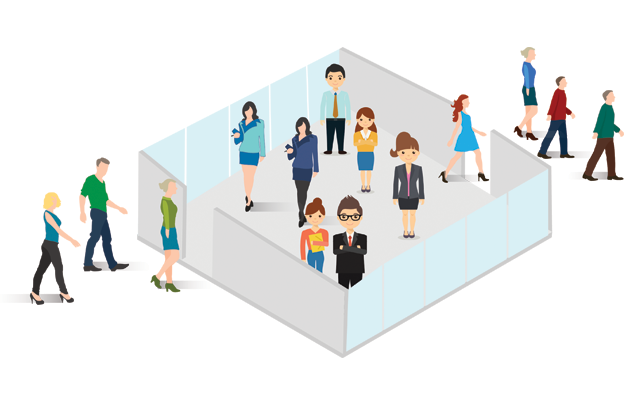

## Objective 

**Can you develop a model of machine learning that can predict customers who will leave the company?**

The aim is to estimate whether a bank's customers leave the bank or not. The event that defines the customer abandonment is the closing of the customer's bank account.

## Details about the dataset:
It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

### **Variables:**

**RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

**CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

**Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

**Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

**Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

**IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

**EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

## Result; 
The model created as a result of LightGBM hyperparameter optimization became the model with the maxium Accuracy Score. (0.9116)

# 1) Exploratory Data Analysis

In [ ]:
# Installation of required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);


In [ ]:
# Reading the dataset
df = pd.read_csv("../input/predicting-churn-for-bank-customers/Churn_Modelling.csv", index_col=0)
df.columns = map(str.lower, df.columns)

In [ ]:
# The first 5 observation units of the data set were accessed.
df.head()

In [ ]:
# The size of the data set was examined. It consists of 10000 observation units and 13 variables.
df.shape

In [ ]:
# Feature information
df.info()

In [ ]:
# Descriptive statistics of the data set accessed.
df.describe().T

In [ ]:
# The average of the age variable was taken according to the dependent variable.
df.groupby("exited").agg("mean")

In [ ]:
# The average of the age variable according to the gender variable was examined.
df.groupby("gender").agg({"age": "mean"})

In [ ]:
# The average of the dependent variable according to the gender variable was examined.
df.groupby("gender").agg({"exited": "mean"})

In [ ]:
# The average of the dependent variable according to the geography variable was examined.
df.groupby("geography").agg({"exited": "mean"})

In [ ]:
# The frequency of the dependent variable has been reached.
df["exited"].value_counts()

In [ ]:
# Access to those who left us through the dependent variable. (exited == 1)
churn = df[df["exited"] == 1]

In [ ]:
# The first 5 observation units were reached.
churn.head()

In [ ]:
# Size information has been accessed.
churn.shape

In [ ]:
# Who left most than the gender variable?
churn.groupby("gender").agg({"exited": "count"})

In [ ]:
# Which country has left us the most?
churn.groupby("geography").agg({"exited": "count"})

In [ ]:
# Access to those who do not leave us on the dependent variable. (exited == 0)
non_churn = df[df["exited"] == 0]

In [ ]:
# The first 5 observation units were reached.
non_churn.head()

In [ ]:
# Size information has been accessed.
non_churn.shape

In [ ]:
# Which country does not leave the most?
non_churn.groupby("geography").agg({"exited": "count"})

In [ ]:
# Unique observation units were examined. Surname variable will be examined.
df.nunique()

In [ ]:
# What are the most commonly used surnames?
df.groupby('surname')['surname'].count().sort_values(ascending=False).head(10)

In [ ]:
# The most commonly used surname was examined and observed to be non-multiplexing.
df[df["surname"] == "Smith"]

In [ ]:
# They were grouped by gender variable and looked at how many years on average they were clients.
df.groupby(["gender", "exited"]).agg({"tenure" : "mean"})

In [ ]:
# Min, mean and max values ​​of all variables were taken according to the dependent variable.
df.groupby("exited").agg(["min","mean","max"])

In [ ]:
# Isactivemember is grouped according to the hascrcard variables and the dependent variable is examined.
df.groupby(["isactivemember", "hascrcard"]).agg({"exited" : "count"})

In [ ]:
# Isactivemember is grouped according to hascrcard variables and the balance variable is examined.
df.groupby(["isactivemember", "hascrcard"]).agg({"balance" : "mean"})

In [ ]:
# The balance variable was examined according to the gender variable.
df.groupby("gender").agg({"balance": "mean"})

In [ ]:
# The age variable was divided into 5 parts and the age range in which there is the most abandonment was examined.
df["NewAge"] = pd.qcut(df['age'], 5)
df.groupby("NewAge")["exited"].value_counts()

In [ ]:
# The dependent variable was studied according to the gender variable and age range variable.
df.groupby(["gender","NewAge" ])["exited"].value_counts()

In [ ]:
# How many people whose balance is 0 and do not leave?
df[(df["balance"] == 0) & (df["exited"] == 0)].shape

In [ ]:
# How many people whose balance is 0 leave?
df[(df["balance"] == 0) & (df["exited"] == 1)].shape

In [ ]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 1 variables that act as a positive correlation to the exited dependent variable.
# This variable is Age. As this increases, the Result variable increases.
df.corr()

# 2) Data Visualization

In [ ]:
# The distribution of the dependent variable in the dataset is plotted as pie and columns graphs.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')
sns.countplot('exited',data=df,ax=ax[1])
ax[1].set_title('exited')
plt.show()


In [ ]:
# Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography', hue = 'exited',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'exited',data = df, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'exited',data = df, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'exited',data = df, ax=axarr[1][1])

In [ ]:
# The distribution of the dependent variable according to the gender variable is plotted in the pie chart.
import plotly.express as px
fig = px.pie(df, values =df.groupby("gender")["exited"].value_counts(), names = ["Female,0","Female 1","Male,0","Male,1"])
fig.show()

In [ ]:
# Dependent variable was plotted according to age and geography variable.
import plotly.express as px
fig = px.bar(df,y = "exited", x = "age" , color = "geography")
fig.show()

In [ ]:
# Correlation Matrix
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
# Boxplot graph for outlier observation analysis
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'exited', hue = 'exited',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = df, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = df, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = df, ax=axarr[2][1])

# 3) Data Preprocessing

## 3.1) Missing and Outlier Observation Analysis

In [ ]:
# Missing Observation Analysis
df.isnull().sum()

In [ ]:
# Outlier Observation Analysis
for feature in df[['creditscore','tenure', 'balance','estimatedsalary']]:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

## 3.2) Feature Engineering

In [ ]:
df["NewAGT"] = df["age"] - df["tenure"]
df["CreditsScore"] = pd.qcut(df['creditscore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["AgeScore"] = pd.qcut(df['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["BalanceScore"] = pd.qcut(df['balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["EstSalaryScore"] = pd.qcut(df['estimatedsalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["NewEstimatedSalary"] = df["estimatedsalary"] / 12 

In [ ]:
df.head()

## 3.3) One Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns =["geography", "gender"], drop_first = True)

In [ ]:
df.head()

In [ ]:
df = df.drop(["customerid","surname","NewAge"], axis = 1)

In [ ]:
df.head()

## 3.4) Scaling

In [ ]:
cat_df = df[["geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"]]

In [ ]:
cat_df.head()

In [ ]:
y = df["exited"]
X = df.drop(["exited","geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"], axis = 1)
cols = X.columns
index = X.index

In [ ]:
X.head()    

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X = pd.concat([X,cat_df], axis = 1)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
print(X.shape, y.shape)

## 3.5) Train-Test Separation & Balancing

In [ ]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)


In [ ]:
# Because it's an unstable data set, we're going to increase the number of samples.
# References: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 4) Modelling

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

## 4.1) Accuracy Score

In [ ]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

## 4.2) Variable Importance Levels of All Models

In [ ]:
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

In [ ]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

# 5) Model Tuning

In [ ]:
# Hyperparameters have previously been obtained with the help of GridSearchCV.
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

## 5.1) Model Tuning Variable Importance Level

In [ ]:
models2 = []
models2.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

# 6) Confusion Matrix

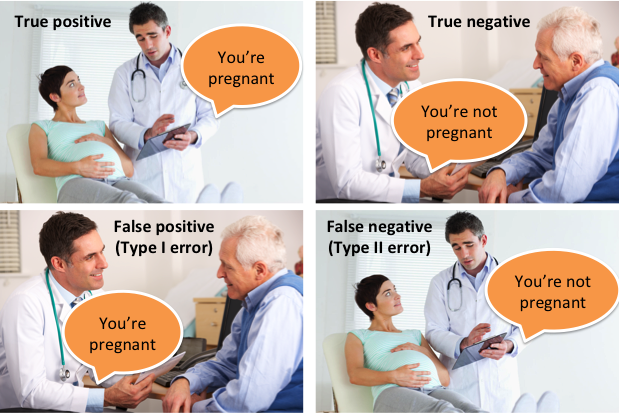

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [ ]:
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

In [ ]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                      title='Confusion matrix')

In [ ]:
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

In [ ]:
df_pred = pd.DataFrame(data=[],columns=["y_test"])
df_pred["y_pred"] = y_pred
df_pred["y_test"] = y_test
df_pred.index = df_pred.index + 1
df_pred.head()

In [ ]:
FP_predicts_indexes = [] 
TP_predicts_indexes=[]
FN_predict_indexes =[]
TN_predicts_indexes  = []
for index, row in df_pred.iterrows():
    if row['y_test'] == 0 and row['y_pred'] == 1:
        FP_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 1:
        TP_predicts_indexes.append(row.name)
    elif row['y_test'] == 0 and row['y_pred'] == 0:
        TN_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 0:
        FN_predict_indexes.append(row.name)    

In [ ]:
df_pred.loc[TN_predicts_indexes,"prediction_result"] = "TN"
df_pred.loc[TP_predicts_indexes,"prediction_result"] = "TP"
df_pred.loc[FP_predicts_indexes,"prediction_result"] = "FP"
df_pred.loc[FN_predict_indexes,"prediction_result"] = "FN"
df_pred.head()

In [ ]:
df_pred[df_pred["prediction_result"] == "FP"].head()

In [ ]:
df_pred[df_pred["prediction_result"] == "FN"].head()

# 7) ROC Curve

In [ ]:
lbgm_tuned = model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# 8) Reporting
The aim of this study was to create classification models for the churn dataset and to predict whether a person abandons us by creating models and to obtain maximum accuracy score in the established models. The work done is as follows:

1) Churn Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and outliers in the data set.

4) During Model Building; Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM, CatBoost like using machine learning models Accuracy  Score were calculated. Later XGBoost, LightGBM, CatBoost hyperparameter optimizations optimized to increase Accuracy score.

5) Result; The model created as a result of LightGBM hyperparameter optimization became the model with the maxium Accuracy Score. **(0.9116)**